In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import torch
import sys
sys.path.insert(0, '../src')

ParameterEstimator_KZ_v1 reached a loss of 0.000876 at epoch 63
ParameterEstimator_KZ_v2 reached a loss of 0.00104 at epoch 65
ParameterEstimator_KZ_v3 reached a loss of 0.0007 at epoch 90
ParameterEstimator_KZ_v4 reached a loss of 0.000887 at epoch 97
ParameterEstimator_KZ_v5 reached a loss of 0.000333 at epoch 65
ParameterEstimator_KZ_v6 reached a loss of 0.000431 at epoch 94
ParameterEstimator_KZ_v7 reached a loss of 0.000653 at epoch 62
ParameterEstimator_KZ_v8 reached a loss of 0.000835 at epoch 86
--------------------------------
ConvNextParameterEstimator_KZ_v1 reached a loss of 0.000296 at epoch 100
ConvNextParameterEstimator_KZ_v2 reached a loss of 0.000272 at epoch 100
ConvNextParameterEstimator_KZ_v3 reached a loss of 0.000268 at epoch 94
--------------------------------


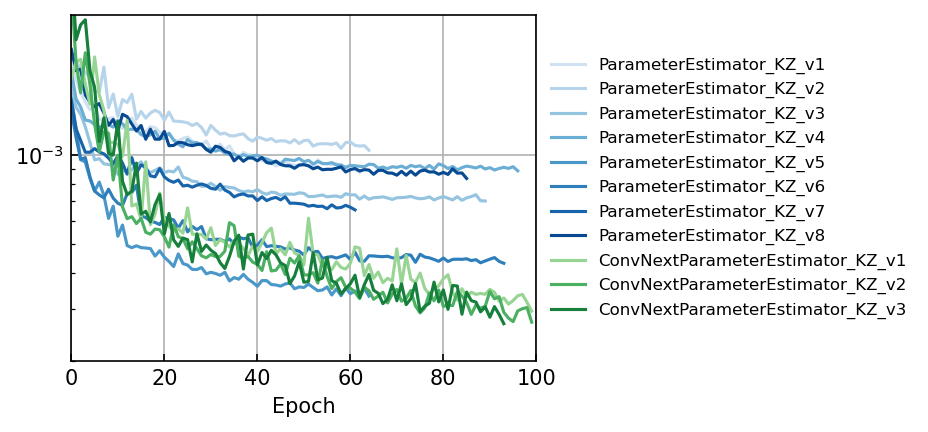

In [2]:
import glob
import os
from parameter_estimator import ParameterEstimator

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, dpi=150, figsize=(4,3))

model_paths = sorted(glob.glob('../models/ParameterEstimator_KZ_v*'))
cmap = plt.cm.Blues
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax.plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]:.3g} at epoch {len(info["losses"])}')

print('--------------------------------')

model_paths = sorted(glob.glob('../models/ConvNext*'))
cmap = plt.cm.Greens
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax.plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]:.3g} at epoch {len(info["losses"])}')

print('--------------------------------')

ax.set(xlabel='Epoch', yscale='log', xlim=[0, 100], ylim=[2e-4, 3e-3])
ax.legend(framealpha=0, fontsize=8, loc='center left', bbox_to_anchor=[1, 0.5])
ax.tick_params(which='both', direction='in')
ax.grid(True)

ConvNextParameterEstimator_KZ_v1 reached a loss of 0.000296 at epoch 100
ConvNextParameterEstimator_KZ_v2 reached a loss of 0.000272 at epoch 100
ConvNextParameterEstimator_KZ_v3 reached a loss of 0.000268 at epoch 94
--------------------------------


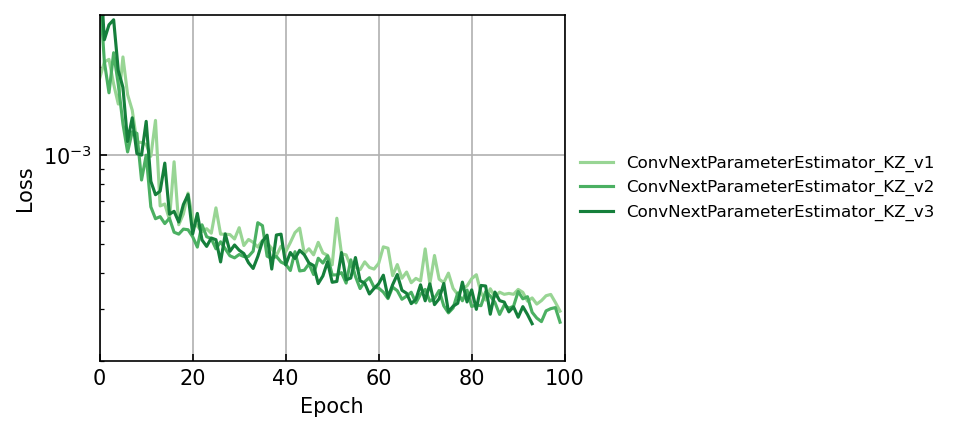

In [3]:
import glob
import os
from parameter_estimator import ParameterEstimator

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, dpi=150, figsize=(4,3))

model_paths = sorted(glob.glob('../models/ConvNext*'))
cmap = plt.cm.Greens
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax.plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]:.3g} at epoch {len(info["losses"])}')

print('--------------------------------')

ax.set(xlabel='Epoch', ylabel='Loss', yscale='log', xlim=[0, 100], ylim=[2e-4, 3e-3])
ax.legend(framealpha=0, fontsize=8, loc='center left', bbox_to_anchor=[1, 0.5])
ax.tick_params(which='both', direction='in')
ax.grid(True)

ParameterEstimator_KZ_v1 reached a loss of 0.000876 at epoch 63
ParameterEstimator_KZ_v2 reached a loss of 0.00104 at epoch 65
ParameterEstimator_KZ_v3 reached a loss of 0.0007 at epoch 90
ParameterEstimator_KZ_v4 reached a loss of 0.000887 at epoch 97
ParameterEstimator_KZ_v5 reached a loss of 0.000333 at epoch 65
ParameterEstimator_KZ_v6 reached a loss of 0.000431 at epoch 94
ParameterEstimator_KZ_v7 reached a loss of 0.000653 at epoch 62
ParameterEstimator_KZ_v8 reached a loss of 0.000835 at epoch 86
--------------------------------


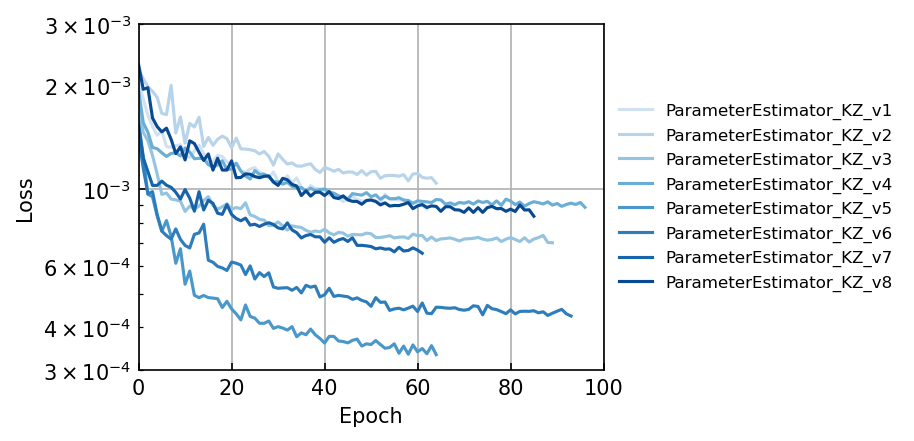

In [4]:
import glob
import os
from parameter_estimator import ParameterEstimator

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, dpi=150, figsize=(4,3))

model_paths = sorted(glob.glob('../models/ParameterEstimator_KZ_v*'))
cmap = plt.cm.Blues
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax.plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]:.3g} at epoch {len(info["losses"])}')

print('--------------------------------')

ax.set(xlabel='Epoch', ylabel='Loss', yscale='log', xlim=[0, 100], ylim=[3e-4, 3e-3])
ax.legend(framealpha=0, fontsize=8, loc='center left', bbox_to_anchor=[1, 0.5])
ax.tick_params(which='both', direction='in')
ax.grid(True)

## Activity estimator

The activity estimator models seem to have little variance. Most likely this is because activity, or rather $\alpha / K$, estimation, requires very little computation -- just look at a local window, and compute its spatial correlation. As a result, the flaws introduced by the RNN may not be affecting training as much.

ParameterEstimator_Activity_v0 reached a loss of 2.12e-05 at epoch 76
ParameterEstimator_Activity_v1 reached a loss of 2e-05 at epoch 50
--------------------------------


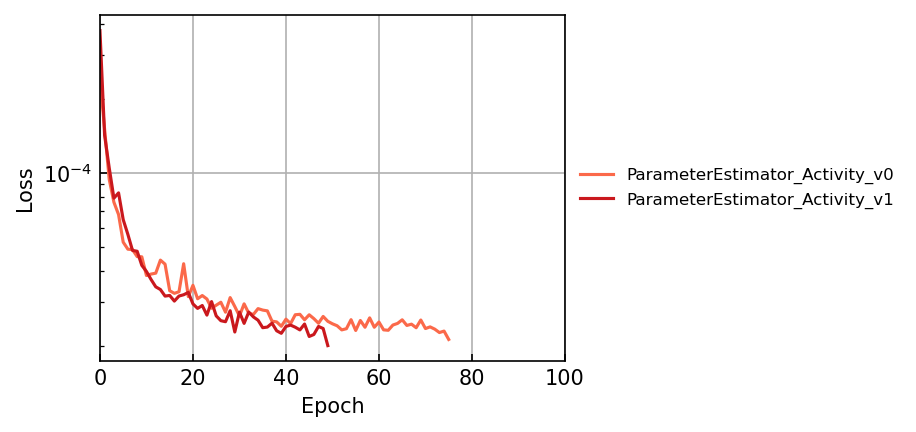

In [5]:

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, dpi=150, figsize=(4,3))

model_paths = sorted(glob.glob('../models/ParameterEstimator_Activity*'))
cmap = plt.cm.Reds
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax.plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]:.3g} at epoch {len(info["losses"])}')

print('--------------------------------')

ax.set(xlabel='Epoch', ylabel='Loss', yscale='log', xlim=[0, 100])
ax.legend(framealpha=0, fontsize=8, loc='center left', bbox_to_anchor=[1, 0.5])
ax.tick_params(which='both', direction='in')
ax.grid(True)